<a href="https://colab.research.google.com/github/Talizg03/weather/blob/main/project_2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("equipmentradar/heavy-equipment-pricing-data")

print("Path to dataset files:", path)

100%|██████████| 52.8k/52.8k [00:00<00:00, 41.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1


In [3]:
# List files in the directory
!ls /root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1



data.csv


In [4]:
import pandas as pd

# Step 1: List the files in the extracted folder to check the CSV file
!ls /root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1

# Step 2: Load the CSV file (replace 'your_file.csv' with the correct file name)
df = pd.read_csv('/root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1/data.csv')

# Step 3: Display the first few rows of the DataFrame
df.head()

# Optionally, you can preview more rows
# Display the first 20 rows
df.head(20)


data.csv


,uuid,meter_hours,category,is_new,manufacturer,region,price_usd,year
0,a6fd823a-4369-4737-ad41-b4ac40b77747,0,80,0,96,38,10000,1998
1,b7568591-ba29-4068-b0a3-826215dd03f8,461,111,0,108,71,10000,2010
2,6b819fee-6b16-4325-930d-d4937a289461,0,56,0,30,33,10100,2002
3,1025cf47-6f68-42f5-b649-2c6118e466e1,277,90,0,95,39,10100,2011
4,f6284931-a569-4528-a665-df9c4fedc543,905,87,0,208,35,10100,2011
5,317cd5cd-30b9-444d-939d-a4a279a6be30,0,56,0,30,16,10200,2001
6,bae79434-4bb6-470b-8213-b5b1fc003e87,0,58,0,30,36,10200,2004
7,1dfa8952-d43c-49a0-b7e5-8f4336a1f77a,0,58,0,30,54,10200,2005
8,91f0b87d-00e5-4e6f-9848-9eb67dc20c4d,437,87,0,208,72,10200,2011
9,55877d90-7683-4001-ae00-bd88ca1c3cab,311,90,0,95,35,10200,2011


In [5]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Load the renamed CSV file
data_path = '/root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1/data.csv'

# Load dataset using pandas
data = pd.read_csv(data_path)

# Check the first few rows to make sure it's loaded properly
print(data.head())

X, y = data.drop(columns='price_usd'), data['price_usd']
feature_names = X.columns

def train_model(X, y):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')

        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Evaluate model performance using RMSE
    from sklearn.metrics import mean_squared_error
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    y_train_pred = rf.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
    print(f"Train: Root Mean Squared Error (RMSE): {train_rmse}")
    print(f"Test: Root Mean Squared Error (RMSE): {rmse}")
    return rf, (X_train, X_test, y_train, y_test)

rf, xs = train_model(X, y)

                                   uuid  meter_hours  category  is_new  \
0  a6fd823a-4369-4737-ad41-b4ac40b77747            0        80       0   
1  b7568591-ba29-4068-b0a3-826215dd03f8          461       111       0   
2  6b819fee-6b16-4325-930d-d4937a289461            0        56       0   
3  1025cf47-6f68-42f5-b649-2c6118e466e1          277        90       0   
4  f6284931-a569-4528-a665-df9c4fedc543          905        87       0   

   manufacturer  region  price_usd  year  
0            96      38      10000  1998  
1           108      71      10000  2010  
2            30      33      10100  2002  
3            95      39      10100  2011  
4           208      35      10100  2011  
Train: Root Mean Squared Error (RMSE): 14499.11622922485
Test: Root Mean Squared Error (RMSE): 30354.271251964234


In [6]:
def perm_importance_df(rf, xs):
    X_train, X_test, y_train, y_test = xs

    # Compute Permutation Importance
    perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)

    # Display the results
    importance_df = pd.DataFrame({
        "Feature": rf.feature_names_in_,
        "Importance": perm_importance.importances_mean,
        "Std Deviation": perm_importance.importances_std,
        'model importance': rf.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    display(importance_df)
    return importance_df

perm_importance_df(rf, xs)

,Feature,Importance,Std Deviation,model importance
6,year,0.850088,0.079072,0.359842
4,manufacturer,0.289121,0.022863,0.200478
2,category,0.282599,0.019877,0.243348
1,meter_hours,0.170000,0.010018,0.118397
0,uuid,0.001790,0.005138,0.034112
5,region,-0.000022,0.001435,0.037977
3,is_new,-0.000814,0.001510,0.005847


,Feature,Importance,Std Deviation,model importance
6,year,0.850088,0.079072,0.359842
4,manufacturer,0.289121,0.022863,0.200478
2,category,0.282599,0.019877,0.243348
1,meter_hours,0.170000,0.010018,0.118397
0,uuid,0.001790,0.005138,0.034112
5,region,-0.000022,0.001435,0.037977
3,is_new,-0.000814,0.001510,0.005847


In [7]:
import pandas as pd
from sklearn.inspection import permutation_importance

def perm_importance_df(rf, xs):
    X_train, X_test, y_train, y_test = xs

    # Compute Permutation Importance
    perm_importance = permutation_importance(
        rf, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1
    )

    # Create the results DataFrame
    importance_df = pd.DataFrame({
        "Feature": rf.feature_names_in_,
        "Permutation Importance": perm_importance.importances_mean,
        "Permutation Std Deviation": perm_importance.importances_std,
        "Model Importance": rf.feature_importances_,
    })

    # Add ranking for permutation and model importances
    importance_df["Permutation Rank"] = importance_df["Permutation Importance"].rank(ascending=False)
    importance_df["Model Rank"] = importance_df["Model Importance"].rank(ascending=False)

    # Sort by Permutation Importance for display
    importance_df = importance_df.sort_values(by="Permutation Importance", ascending=False)

    # Display the DataFrame
    display(importance_df)

    return importance_df

# Call the function with your Random Forest model and data
importance_df = perm_importance_df(rf, xs)


,Feature,Permutation Importance,Permutation Std Deviation,Model Importance,Permutation Rank,Model Rank
6,year,0.850088,0.079072,0.359842,1.0,1.0
4,manufacturer,0.289121,0.022863,0.200478,2.0,3.0
2,category,0.282599,0.019877,0.243348,3.0,2.0
1,meter_hours,0.170000,0.010018,0.118397,4.0,4.0
0,uuid,0.001790,0.005138,0.034112,5.0,6.0
5,region,-0.000022,0.001435,0.037977,6.0,5.0
3,is_new,-0.000814,0.001510,0.005847,7.0,7.0


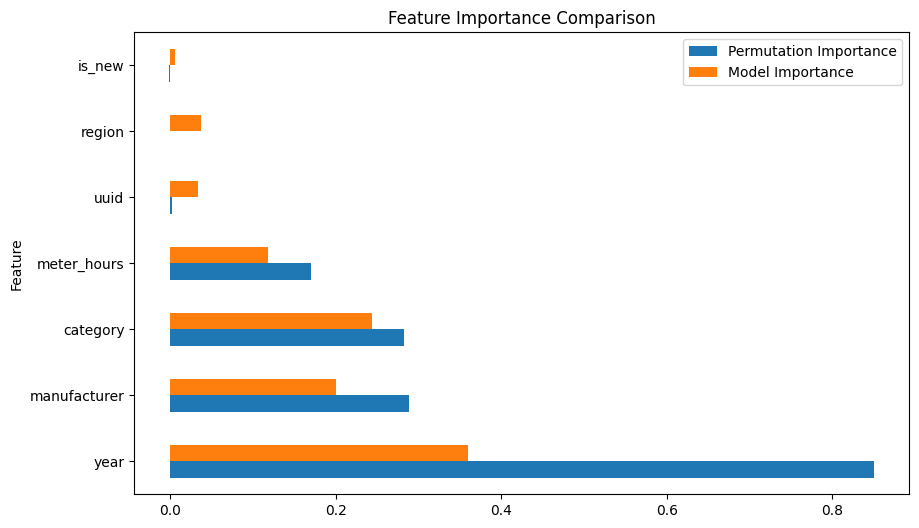

,Feature,Permutation Importance,Permutation Std Deviation,Model Importance,Feature Type,Permutation Rank,Model Rank
0,year,0.850088,0.079072,0.359842,int64,1,1.0
1,manufacturer,0.289121,0.022863,0.200478,int64,2,3.0
2,category,0.282599,0.019877,0.243348,int64,3,2.0
3,meter_hours,0.170000,0.010018,0.118397,int64,4,4.0
4,uuid,0.001790,0.005138,0.034112,int16,5,6.0
5,region,-0.000022,0.001435,0.037977,int64,6,5.0
6,is_new,-0.000814,0.001510,0.005847,int64,7,7.0


In [8]:
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def perm_importance_df(rf, xs, n_repeats=5, random_state=42):
    """
    Computes permutation importance for a trained model and outputs feature importance.

    Parameters:
    - rf: Trained Random Forest (or similar model).
    - xs: Tuple containing (X_train, X_test, y_train, y_test).
    - n_repeats: Number of times the feature is randomly shuffled (default is 5).
    - random_state: Random seed for reproducibility (default is 42).

    Returns:
    - importance_df: A DataFrame containing feature names, permutation importance,
                      model importance, and their respective ranks.
    """

    # Unpack the input tuple
    X_train, X_test, y_train, y_test = xs

    # Compute Permutation Importance
    perm_importance = permutation_importance(
        rf, X_test, y_test, n_repeats=n_repeats, random_state=random_state, n_jobs=-1
    )

    # Create the results DataFrame
    importance_df = pd.DataFrame({
        "Feature": rf.feature_names_in_,
        "Permutation Importance": perm_importance.importances_mean,
        "Permutation Std Deviation": perm_importance.importances_std,
        "Model Importance": rf.feature_importances_,
    })

    # Add feature type to the DataFrame (Optional)
    importance_df["Feature Type"] = [X_train[col].dtype for col in rf.feature_names_in_]

    # Sort by Permutation Importance and assign ranks
    importance_df = importance_df.sort_values(by="Permutation Importance", ascending=False).reset_index(drop=True)
    importance_df["Permutation Rank"] = importance_df.index + 1
    importance_df["Model Rank"] = importance_df["Model Importance"].rank(ascending=False)

    # Plotting the feature importance comparison
    importance_df.sort_values(by="Permutation Importance", ascending=False).plot(
        x="Feature",
        y=["Permutation Importance", "Model Importance"],
        kind="barh",
        figsize=(10, 6),
        title="Feature Importance Comparison"
    )
    plt.show()

    # Display the DataFrame
    display(importance_df)

    return importance_df

# Example usage
importance_df = perm_importance_df(rf, xs)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Use Regressor since price is continuous
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

# Assuming the dataset `df` contains a 'category' column and 'price' column

# Sample DataFrame - replace this with your actual dataset
# df = pd.read_csv("your_data.csv")

# Assuming 'category' is a categorical column (vehicle category) and 'price' is the target
# Load the renamed CSV file
data_path = '/root/.cache/kagglehub/datasets/equipmentradar/heavy-equipment-pricing-data/versions/1/data.csv'

# Load dataset using pandas
data = pd.read_csv(data_path)



# Define features X (including 'category') and target y ('price')
X = df.drop(columns=['price_usd','uuid'])  # Drop price column from features
y = df['price_usd']  # Target is the price column

feature_names = X.columns

def train_model(X, y):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].astype('category')

        if X[col].dtype == 'category':
            X[col] = X[col].cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_pred





array([ 29500, 210300,  41100,  68200,  37000,  17300,  26200, 123300,
       101600,  13300,  87500,  12500, 152600,  30500, 437900,  40400,
        10100,  95800,  52300,  47700, 117200,  28900,  30900,  14900,
       112200,  26900,  12600,  25200,  50400, 286300,  29600,  27000,
        20800,  95800,  32300,  33400, 106800, 230600, 202700,  27700,
        41500,  52200,  44200, 164500, 117700, 326300,  32800,  27900,
        21300,  87800,  16700,  94400,  52200, 213200,  38500, 108100,
       135200,  87800,  25600,  40400,  28500,  56600,  36000,  28000,
        10300, 179700,  23600,  18000,  52700,  56600, 182200, 180500,
        28700, 180800, 124800,  41500,  74300,  41000,  28700, 314300,
        17600, 134500,  40700,  64100, 178800, 414100,  45000,  16500,
        32600,  83500,  56600, 191000, 220100, 176100, 100500, 297900,
        29400, 165200,  28500, 167400, 265900,  13400,  32400, 220400,
       317500, 165200,  56600, 112300,  28800,  16000,  14000,  31700,
      

In [10]:
y_test == y_test_pred # True predictions
print('Correct predictions:', (y_test == y_test_pred).sum(), f", {(y_test == y_test_pred).mean():.2%}")
print('Incorrect predictions:', (y_test != y_test_pred).sum(), f", {(y_test != y_test_pred).mean():.2%}")


Correct predictions: 3 , 0.86%
Incorrect predictions: 346 , 99.14%
